In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

# LDA

In [23]:
data = data[['sepal length (cm)', 'sepal width (cm)']]
data

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [18]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [25]:
lda = LinearDiscriminantAnalysis()

In [26]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [27]:
lda.predict(X_test)

array([0, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0,
       1, 1, 1, 2, 1, 1, 0, 2, 1, 0, 0, 1, 1, 2, 0, 1])

In [28]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,2,2
2,1,1
3,2,2
4,0,0
5,2,1
6,0,0
7,1,1
8,0,0
9,1,1


In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accuracy_score(y_test, lda.predict(X_test))

0.8421052631578947

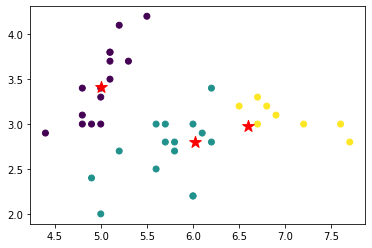

In [45]:
plt.scatter(X_test['sepal length (cm)'], X_test['sepal width (cm)'], c=lda.predict(X_test))
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

# KMeans

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

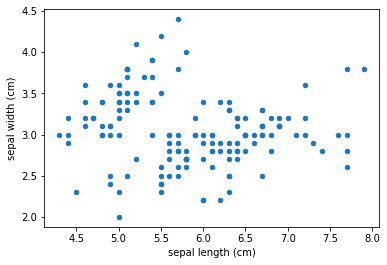

In [50]:
data.plot(kind='scatter', x='sepal length (cm)', y='sepal width (cm)')

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
X_scaled = scaler.fit_transform(data)

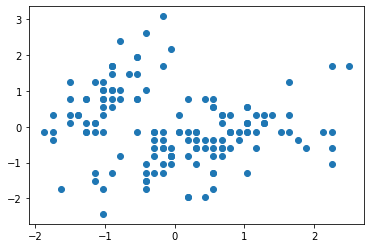

In [75]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn')

In [58]:
from sklearn.cluster import KMeans

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


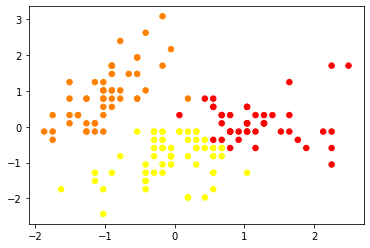

In [67]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)
clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=30)

In [69]:
k_inertia = []
ks = range(1, 20)
for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

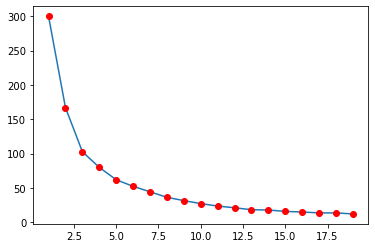

In [71]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Вроде на 3, отдаленно напоминающее локоть есть))